In [ ]:
import numpy as np
import pandas as pd
import pickle
from lshash.lshash import LSHash
import networkx as nx


import time

In [ ]:
with open('Data/feature_matrix/fc6_full_dress.p','rb') as f:
    feat_dresses = pickle.load(f)

In [ ]:
lsh = LSHash(8,feat_dresses.shape[1])

In [ ]:
start = time.time()
for i in range(feat_dresses.shape[0]):
    lsh.index(feat_dresses[i,:],extra_data = i)
print('{:.3f}'.format(time.time()-start))

In [ ]:
G = nx.Graph()

In [17]:
start = time.time()
for i in range(feat_dresses.shape[0]):
    G.add_node(i)
    edges = lsh.query(feat_dresses[i,:], num_results=100)
    for e in edges:
        G.add_edge(i,e[0][1],weight=e[1])
        
print('{:.3f}'.format(time.time()-start))

1352.051


In [19]:
with open('Data/feature_matrix/Dress_network.p','wb') as f:
    pickle.dump(G,f)

In [22]:
bbox = pd.read_table('Data/DeepFashion/list_bbox.txt',sep='\s+')
cat = pd.read_table('Data/DeepFashion/list_category_img.txt',sep='\s+')
df = bbox[cat['category_label'] == 41]

In [20]:
from IPython.display import display
import PIL
from PIL import ImageDraw



def draw_bbox(bbox):
    img = PIL.Image.open('Data/DeepFashion/'+bbox['image_name']).convert('RGBA')
    
    lx = bbox['x_1']
    ly = bbox['y_1']
    ux = bbox['x_2']
    uy = bbox['y_2']
    rect = PIL.Image.new('RGBA', img.size, (255,255,255,0))
    d = ImageDraw.Draw(img)
    d.rectangle(((lx,ly), (ux,uy)), outline="red")
    return PIL.Image.alpha_composite(img,rect)

not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not connected
not co

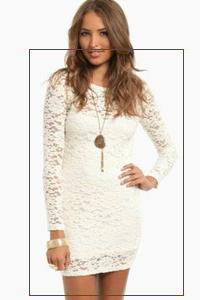

{'weight': 308.28688916606268}


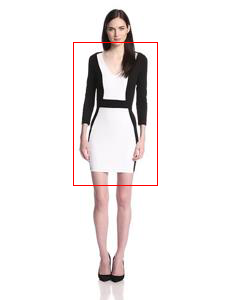

{'weight': 341.81146484107717}


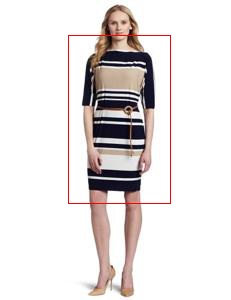

In [80]:
i = np.random.randint(df.shape[0],size=2)
while not nx.has_path(G,i[0],i[1]):
    print("not connected")
    i = np.random.randint(df.shape[0],size=2)

p = nx.shortest_path(G,i[0],i[1],weight='weight')
for i in range(len(p)):
    display(draw_bbox(df.iloc[p[i]]))
    if i<len(p)-1:
         print(G[p[i]][p[i+1]])

In [71]:
list(range(len(p)))

[0, 1, 2]

In [41]:
G.number_of_edges()

2111090